In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare
from scipy.stats import ttest_rel

# SUS Presence Results

## Hypothese
Mindestens eine der Techniken erzeugt ein höheres Präsenzempfinden, als die anderen beiden. 

## Null-Hyptohese
Keine der Techniken erzeugt ein höheres Präsenzempfinden.

In [2]:
presence_df = pd.read_csv("./Vorbereitete Daten/SUS Presence.csv")

In [3]:
presence_df.head()

,Person,Condition,SUS
0,1,0,0.166667
1,2,0,0.166667
2,3,0,0.000000
3,4,0,0.833333
4,5,0,0.000000


Prüfen, ob Daten normalverteilt sind

In [4]:
shapiro(presence_df['SUS'].values)

ShapiroResult(statistic=0.4348118305206299, pvalue=1.25030583109087e-10)

Da der p-Wert kleiner als 0.05 ist, sind die Daten nicht normalverteilt. Dementsprechend, wählen wir den Friedmann Test

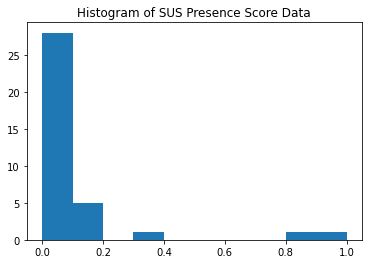

In [5]:
plt.hist(presence_df['SUS'])
plt.title("Histogram of SUS Presence Score Data")
plt.show()

## Friedmann-Test

In [66]:
teleport_throw_df = presence_df.loc[presence_df['Condition'] == 0]
index_finger_df = presence_df.loc[presence_df['Condition'] == 1]
telepath_df = presence_df.loc[presence_df['Condition'] == 2]
friedmanchisquare(teleport_throw_df.values, index_finger_df.values, telepath_df.values)

FriedmanchisquareResult(statistic=-101.2100617828773, pvalue=1.0)

In [68]:
friedmanchisquare(teleport_throw_df['SUS'], index_finger_df['SUS'], telepath_df['SUS'])

FriedmanchisquareResult(statistic=0.5454545454545455, pvalue=0.7613003866968736)

Da der p-Wert größer ist als 0.05 können wir kein signifikanten unterschied zwischen dem Präsenzempfinden der drei Techniken feststellen und die Null-Hypothese somit nicht ablehnen.

## Paired T-Test

Conition 0 & 1

In [60]:
ttest_rel(presence_df[presence_df['Condition'] == 0]['SUS'], presence_df[presence_df['Condition'] == 1]['SUS'])


Ttest_relResult(statistic=0.9590268201252887, pvalue=0.3581504855953057)

Condition 0 & 2

In [61]:
ttest_rel(presence_df[presence_df['Condition'] == 0]['SUS'], presence_df[presence_df['Condition'] == 2]['SUS'])


Ttest_relResult(statistic=0.5606119105813882, pvalue=0.5862993069206739)

Condition 1 & 2

In [62]:
ttest_rel(presence_df[presence_df['Condition'] == 1]['SUS'], presence_df[presence_df['Condition'] == 2]['SUS'])


Ttest_relResult(statistic=-0.6158817620896669, pvalue=0.5505037155793886)

## Comparing Means

In [96]:
sus_teleport_throw_mean = presence_df[presence_df['Condition'] == 0]['SUS'].mean()
sus_index_finger_mean = presence_df[presence_df['Condition'] == 1]['SUS'].mean()
sus_telepath_mean = presence_df[presence_df['Condition'] == 2]['SUS'].mean()
print("Mean Teleport Throw ",sus_teleport_throw_mean)
print("Mean Index Finger ", sus_index_finger_mean)
print("Mean Telepath ", sus_telepath_mean)

Mean Teleport Throw  0.11111111111666667
Mean Index Finger  0.041666666666666664
Mean Telepath  0.097222222225


# Simulator Sickness Questionaire

## Hypothese
Eine der Techniken erzeugt mehr Simulator Sickness als die anderen beiden. 

## Null-Hypothese
Keine der Techniken erzeugt mehr Simulator Sickness als die anderen. 

In [7]:
ssq_df = pd.read_csv("./Vorbereitete Daten/SSQ.csv")

In [8]:
ssq_df.head()

,Person,Condition,N,O,D,TS
0,1,0,38.16,53.06,97.44,67.32
1,2,0,9.54,15.16,41.76,22.44
2,3,0,0.00,15.16,13.92,11.22
3,4,0,0.00,7.58,13.92,7.48
4,5,0,19.08,7.58,0.00,11.22


Prüfen, ob die Daten normalverteilt sind.

In [9]:
shapiro(ssq_df['TS'])

ShapiroResult(statistic=0.8183797001838684, pvalue=3.856932744383812e-05)

Da der Wert kleiner als 0.05 ist, sind die Daten nicht normalverteilt. 

Text(0.5, 1.0, 'Histogram of SSQ Score Data')

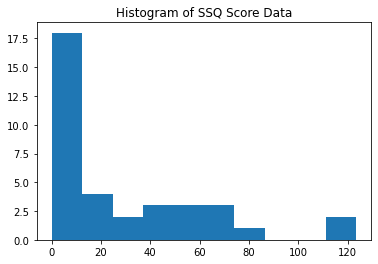

In [10]:
plt.hist(ssq_df['TS'])
plt.title("Histogram of SSQ Score Data")

## Friedmann-Test

In [11]:
teleport_throw_df_ssq = ssq_df.loc[ssq_df['Condition'] == 0]
index_finger_df_ssq = ssq_df.loc[ssq_df['Condition'] == 1]
telepath_df_ssq = ssq_df.loc[ssq_df['Condition'] == 2]

In [69]:
friedmanchisquare(telepath_df_ssq['TS'], index_finger_df_ssq['TS'], telepath_df_ssq['TS'])

FriedmanchisquareResult(statistic=0.18181818181818182, pvalue=0.9131007162822623)

Auch hier können wir keinen signifikanten Unterschied zwischen den Conditions feststellen. 

## Paired T-Test

Condition 0 & 1

In [65]:
ttest_rel(ssq_df[ssq_df['Condition'] == 0]['TS'], ssq_df[ssq_df['Condition'] == 1]['TS'])


Ttest_relResult(statistic=0.7320306445336354, pvalue=0.4794563282688624)

Condition 0 & 2

In [70]:
ttest_rel(ssq_df[ssq_df['Condition'] == 0]['TS'], ssq_df[ssq_df['Condition'] == 2]['TS'])


Ttest_relResult(statistic=-0.13885723663089275, pvalue=0.8920724943633306)

Condition 1 & 2

In [71]:
ttest_rel(ssq_df[ssq_df['Condition'] == 1]['TS'], ssq_df[ssq_df['Condition'] == 2]['TS'])


Ttest_relResult(statistic=-0.7219101198180631, pvalue=0.4854130594471644)

## Comparing Means

In [95]:
ssq_teleport_throw_mean = ssq_df[ssq_df['Condition'] == 0]['TS'].mean()
ssq_index_finger_mean = ssq_df[ssq_df['Condition'] == 1]['TS'].mean()
ssq_telepath_mean = ssq_df[ssq_df['Condition'] == 2]['TS'].mean()
print("Mean Teleport Throw ",ssq_teleport_throw_mean)
print("Mean Index Finger ", ssq_index_finger_mean)
print("Mean Telepath ", ssq_telepath_mean)

Mean Teleport Throw  30.855000000000004
Mean Index Finger  23.686666666666667
Mean Telepath  32.10166666666667


# SUS Usability Results

## Hypothese
Midnestens eine der Techniken weist eine höhere Usability auf, als die anderen. 

## Null-Hypothese
Keine der Techniken weist eine höhere Usability auf, als die anderen. 

In [13]:
usability_df = pd.read_csv("./Vorbereitete Daten/SUS Usability.csv")

In [14]:
usability_df.head()

,Person,Condition,Score
0,1,0,42.5
1,2,0,67.5
2,3,0,77.5
3,4,0,72.5
4,5,0,52.5


Prüfen ob die Daten normalverteilt sind

In [15]:
shapiro(usability_df['Score'])

ShapiroResult(statistic=0.9667107462882996, pvalue=0.3426290452480316)

Da der Wert größer als 0.05 ist, sind die Daten normalverteilt. 

Text(0.5, 1.0, 'Histogram of SUS Usability Score Data')

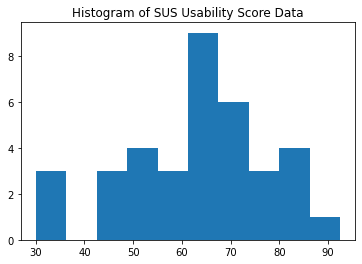

In [16]:
plt.hist(usability_df['Score'])
plt.title("Histogram of SUS Usability Score Data")

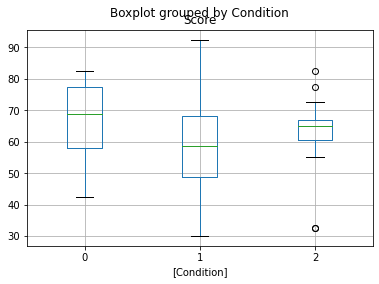

In [17]:
plot_df = usability_df.drop(columns=['Person'])
plot_df.head()
#fig, ax = plt.subplot()
ax = plot_df.boxplot(
    
    by='Condition'

)


## Performing Anova repeated measures 

In [29]:
from statsmodels.stats.anova import AnovaRM

In [30]:
anova = AnovaRM(data=usability_df, depvar='Score', subject='Person', within=['Condition']).fit()

In [20]:
print(anova)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Condition  0.9521 2.0000 22.0000 0.4013



Der p-Wert größer ist als 0.05. Deshalb kann die Null-Hypothese, dass es einen signifikanten Unterschied zwischen den Locomotion-Techniken gibt, nicht abgelehnt werden. 

## Comparing Means

In [93]:
usability_teleport_throw_mean = usability_df[usability_df['Condition'] == 0]['Score'].mean()
usability_index_finger_mean = usability_df[usability_df['Condition'] == 1]['Score'].mean()
usability_telepath_mean = usability_df[usability_df['Condition'] == 2]['Score'].mean()
print("Mean Teleport Throw ",usability_teleport_throw_mean)
print("Mean Index Finger ", usability_index_finger_mean)
print("Mean Telepath ", usability_telepath_mean)

Mean Teleport Throw  66.66666666666667
Mean Index Finger  59.375
Mean Telepath  61.458333333333336


# NASA TLX
Hypothese: Eine der Techniken weißt einen signifikant anderen Workload auf
Null-Hypothese: Keine der Techniken weißt einen signifikant anderen Workload auf

In [45]:
nasa_raw_tlx_df = pd.read_csv("./Vorbereitete Daten/NASA TLX.csv")

In [49]:
shapiro(nasa_raw_tlx_df['Score'])

ShapiroResult(statistic=0.9845640063285828, pvalue=0.8852656483650208)

Da der Wert größer als 0.05 ist, sind die Daten normalverteilt. 

Text(0.5, 1.0, 'Histogram of NASA RAW TLX Score Data')

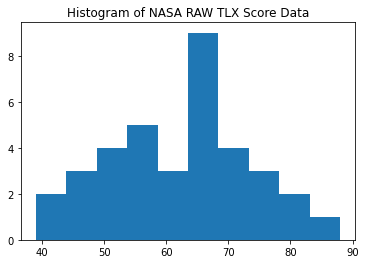

In [78]:
plt.hist(nasa_raw_tlx_df['Score'])
plt.title("Histogram of NASA RAW TLX Score Data")

## Anova Repeated Measures

In [52]:
from statsmodels.stats.anova import AnovaRM
nasa_tlx_anova = AnovaRM(data=nasa_raw_tlx_df, depvar='Score', subject='Person', within=['Condition']).fit()
print(nasa_tlx_anova)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Condition  1.3849 2.0000 22.0000 0.2713



### Performing T Test

Condition 0 & 1

In [56]:
ttest_rel(nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 0]['Score'], nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 1]['Score'])


Ttest_relResult(statistic=0.687866503802132, pvalue=0.5057829727346829)

Condition 0 & 2

In [57]:
ttest_rel(nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 0]['Score'], nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 2]['Score'])


Ttest_relResult(statistic=1.8243091813731829, pvalue=0.09536087947792626)

Condition 1 & 2

In [91]:
ttest_rel(nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 1]['Score'], nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 2]['Score'])


Ttest_relResult(statistic=0.9699611206569547, pvalue=0.3529104583165513)

## Printing Means directly

In [92]:
nasa_teleport_throw_mean = nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 0]['Score'].mean()
nasa_index_finger_mean = nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 1]['Score'].mean()
nasa_telepath_mean = nasa_raw_tlx_df[nasa_raw_tlx_df['Condition'] == 2]['Score'].mean()
print("Mean Teleport Throw ",nasa_teleport_throw_mean)
print("Mean Index Finger ", nasa_index_finger_mean)
print("Mean Telepath ", nasa_telepath_mean)

Mean Teleport Throw  66.0
Mean Index Finger  62.333333333333336
Mean Telepath  58.5


# HCI Final Question

Hypothese: Es gibt einen Signifikanten unterschied, darin, ob Menschen die Technik gerne benutzen
Null-Hypothese: es gibt keinen Signifikanten unterschied

In [80]:
hci_final_df = pd.read_csv("./Vorbereitete Daten/HCI Final Question.csv")

In [81]:
hci_final_df.head()

,Person,Condition,Score
0,1,0,2
1,2,0,5
2,3,0,4
3,4,0,4
4,5,0,2


## Shapiro Wilk Test

In [82]:
shapiro(hci_final_df['Score'])

ShapiroResult(statistic=0.8828779458999634, pvalue=0.001199571881443262)

Daten sind **normalverteilt**

Text(0.5, 1.0, 'Histogram of Final Question')

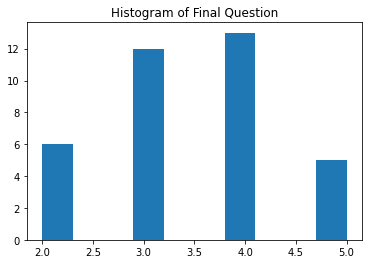

In [83]:
plt.hist(hci_final_df['Score'])
plt.title("Histogram of Final Question")

## Anova repeated measures


In [85]:
from statsmodels.stats.anova import AnovaRM
hci_final_anova = AnovaRM(data=hci_final_df, depvar='Score', subject='Person', within=['Condition']).fit()
print(hci_final_anova)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Condition  0.0242 2.0000 22.0000 0.9761



Auch hier kein signifikanter Unetrschied

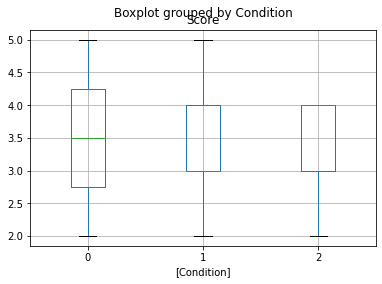

In [86]:
plot_final_df = hci_final_df.drop(columns=['Person'])
plot_final_df.head()
#fig, ax = plt.subplot()
ax = plot_final_df.boxplot(
    
    by='Condition'

)

In [89]:
teleport_throw_mean = hci_final_df[hci_final_df['Condition'] == 0]['Score'].mean()
index_finger_mean = hci_final_df[hci_final_df['Condition'] == 1]['Score'].mean()
telepath_mean = hci_final_df[hci_final_df['Condition'] == 2]['Score'].mean()
print("Mean Teleport Throw ",teleport_throw_mean)
print("Mean Index Finger ", index_finger_mean)
print("Mean Telepath ", telepath_mean)

Mean Teleport Throw  3.5
Mean Index Finger  3.4166666666666665
Mean Telepath  3.5
